<a href="https://colab.research.google.com/github/brijw/DataAnalytics/blob/main/final_kmeans_corpus_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import pandas as pd
import nltk
import textblob
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
import plotly
#plotly.offline.init_notebook_mode (connected = True)

from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Mounted at /content/drive


In [2]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MSC/Analytics/Comments.xlsx')
#docs = data['Comment']

In [3]:
data.head()

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...


In [4]:
data.shape

(3874, 2)

In [5]:
data.describe()

,comment_id
count,3874.000000
mean,3621.646618
std,1969.848443
min,5.000000
25%,2022.250000
50%,3358.000000
75%,5129.500000
max,7942.000000


In [6]:
data['Comment']=data['Comment'].apply(str)
# Proprocessing the data
data['Comment']=data['Comment'].str.lower()
# Code to remove the Hashtags from the text
data['Comment']=data['Comment'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['Comment']=data['Comment'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['Comment']=data['Comment'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['Comment']=data['Comment'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['Comment']=data['Comment'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['Comment']=data['Comment'].apply(lambda x:re.sub('@[^\s]+','',x))

In [7]:
data=data[['Comment']]

In [8]:
data.head()

,Comment
0,djfjkdfjkjkffdk edited
1,faith has exhibited enthusiasm in taking on th...
2,he now has now understood the structure of gra...
3,the intern was oriented on ict setup and infra...
4,the student was oriented on the organization s...


In [9]:
# data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/MSC/Analytics/Corpus_Files/corpustext_cleaned.csv', index = False)

In [10]:
# Making the copy of th data
km=data.copy()

def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w.lower()) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

In [11]:
km['Comment']=km['Comment'].apply(str)

In [12]:
km.head()

,Comment
0,djfjkdfjkjkffdk edited
1,faith has exhibited enthusiasm in taking on th...
2,he now has now understood the structure of gra...
3,the intern was oriented on ict setup and infra...
4,the student was oriented on the organization s...


In [13]:
# km.to_csv(r'/content/drive/MyDrive/Colab Notebooks/MSC/Analytics/Corpus_Files/corpuscollection.csv', index = False)

In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

rem_stopwords_tokenize(km,'Comment')
lemmatize_all(km,'Comment')

km['Comment']=km['Comment'].apply(lambda x:' '.join([i+' ' for i in x]))
# Removing double spaces if created
km['Comment']=km['Comment'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [15]:
km.head()

,Comment
0,djfjkdfjkjkffdk edited
1,faith exhibited enthusiasm taking project hand...
2,understood structure grail different component...
3,intern oriented ict setup infrastructure sorot...
4,student oriented organization structure develo...


Converting the text into vectors using TdidfVectorizer

In [16]:
#pd.DataFrame(X).to_csv('corpustfid.csv') 

In [17]:
# pd.DataFrame(X).to_csv(r'/content/drive/MyDrive/Colab Notebooks/MSC/Analytics/Corpus_Files/corpustfid.csv', index = False)

In [18]:
#print(X)

In [19]:
# Tfidf Vectorizer
tf=TfidfVectorizer(    max_df=0.5,
    min_df=5,
    stop_words="english",)
# Fit transform the data
X=tf.fit_transform(km['Comment'].values)

In [20]:
for i, feature in enumerate(tf.get_feature_names_out()[:20]):
    print(i, feature)

0 10
1 20
2 2019
3 aaron
4 ability
5 abit
6 able
7 absence
8 acceptable
9 acceptance
10 access
11 accessed
12 accomplish
13 accomplished
14 accomplishing
15 according
16 account
17 accountability
18 achieved
19 acknowledged


In [21]:
tf

TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

In [22]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k,  batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 1 clusters
Fit 3 clusters
Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters


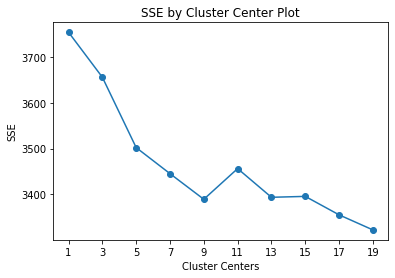

In [23]:
find_optimal_clusters(X, 20)

In [24]:
from sklearn.metrics import silhouette_samples

def find_silhoute_clusters_km_mini_batch_2(data, k):
    
    

    km = MiniBatchKMeans(n_clusters=k,  batch_size=2048, random_state=20)
    y_km = km.fit_predict(data)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, y_km, metric='euclidean'    )
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      plt.barh(range(y_ax_lower, y_ax_upper),
      c_silhouette_vals,
      height=1.0,
      edgecolor='none',
      color=color)
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
    color="red",
    linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

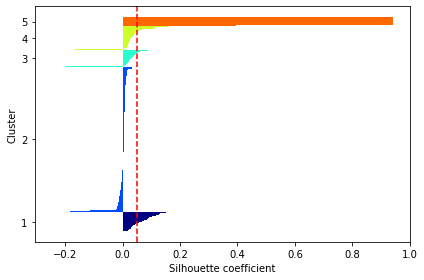

In [25]:
find_silhoute_clusters_km_mini_batch_2(X, 5)

In [26]:
from collections import defaultdict
from sklearn import metrics
from time import time

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [27]:
kmeans_model = MiniBatchKMeans(n_clusters=5,  batch_size=2048, random_state=20).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.050123790700506245

In [28]:
kmeans = MiniBatchKMeans(n_clusters=5,  batch_size=256, random_state=20)
labels = kmeans_model.labels_

fit_and_evaluate(kmeans, X, name="MiniBatchKMeans")

clustering done in 0.03 ± 0.01 s 
Homogeneity: 0.269 ± 0.127
Completeness: 0.345 ± 0.029
V-measure: 0.278 ± 0.121
Adjusted Rand-Index: 0.239 ± 0.124
Silhouette Coefficient: 0.036 ± 0.024


In [29]:
clusters = MiniBatchKMeans(n_clusters=5,  batch_size=256, random_state=20).fit_predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


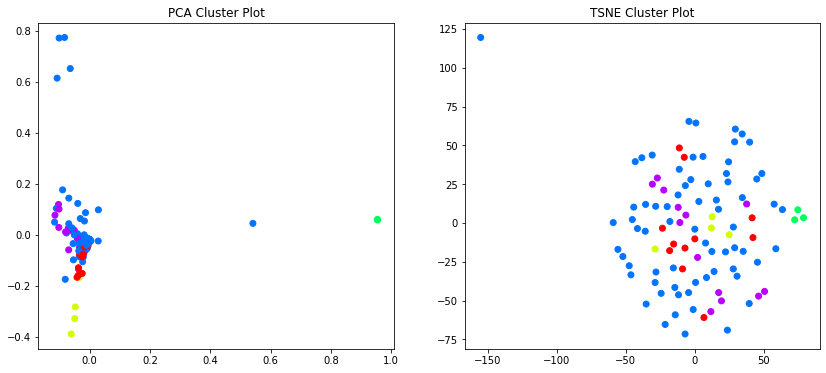

In [30]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)+1
    max_items = np.random.choice(range(data.shape[0]), size=100, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

In [31]:
clusters = MiniBatchKMeans(n_clusters=5, init_size=128, batch_size=256, random_state=20).fit_predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


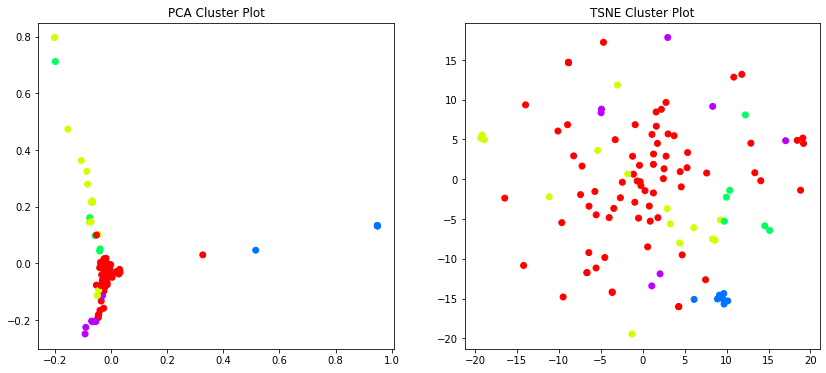

In [32]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)+1
    max_items = np.random.choice(range(data.shape[0]), size=300, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=110, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

In [33]:
# Function  to get the top keywords
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X, clusters, tf.get_feature_names(), 10)


Cluster 0
app,learn,task,server,time,managed,week,student,internship,challenge

Cluster 1
term,team,operating,coworkers,week,linux,working,relationship,progress,good

Cluster 2
week,able,student,task,progress,time,team,good,great,work

Cluster 3
installation,recording,achieved,technically,website,hand,week,development,task,progressive

Cluster 4
supposed,explaining,skill,end,weekmain,weektasks,internship,successfully,task,completed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
# Making a Categories column and putting the values there
km['Categories']=clusters
# Having a look at the data

In [35]:
km[km['Categories']==0].head()

,Comment,Categories
0,djfjkdfjkjkffdk edited,0
1,faith exhibited enthusiasm taking project hand...,0
2,understood structure grail different component...,0
3,intern oriented ict setup infrastructure sorot...,0
4,student oriented organization structure develo...,0


In [36]:
km[km['Categories']==1].head()

,Comment,Categories
7,studentweekly progress justifiably good charac...,1
13,faced problem identifying symbol part asked qu...,1
16,little delay constant supervision task finally...,1
22,good knowledge whole process installation,1
28,good attitude resilience isgood start,1


In [37]:
km[km['Categories']==2].head()

,Comment,Categories
20,stephen diligent work made effort resolve issu...,2
30,good progressexpect student work together period,2
41,part challenging especially configuration term...,2
68,learnt aspect wireless network work put practice,2
87,given assignment work personal website wordpre...,2


In [38]:
km[km['Categories']==3].head()

,Comment,Categories
326,progressive,3
329,progressive,3
330,progressive,3
334,progressive,3
335,progressive,3


In [39]:
# Making a Categories column and putting the values there
# Having a look at the data
km[km['Categories']==4].head()

,Comment,Categories
5,activity well completed,4
14,activity took time completed completed satisfa...,4
19,noted task completed,4
101,completed satisfaction,4
111,completed satisfaction,4


In [40]:
# km['Categories'].replace({0:'Very Poor',1:'Poor',2:'Good',3:'Neutral',4:'Excellent'},inplace=True)

km['Categories'].replace({0:'Poor',1:'Good',2:'Very Poor',3:'Neutral',4:'Excellent'},inplace=True)

In [41]:
kmeans_vector=tf.fit_transform(km['Comment'].values)
pca3 = PCA(n_components=3).fit_transform(kmeans_vector.todense())
px.scatter_3d(x=pca3[:,0],y=pca3[:,1],z=pca3[:,2],color=km['Categories'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [42]:
km.head()

,Comment,Categories
0,djfjkdfjkjkffdk edited,Poor
1,faith exhibited enthusiasm taking project hand...,Poor
2,understood structure grail different component...,Poor
3,intern oriented ict setup infrastructure sorot...,Poor
4,student oriented organization structure develo...,Poor


In [43]:
# km.to_csv(r'/content/drive/MyDrive/Colab Notebooks/MSC/Analytics/Corpus_Files/categorised_corpus.csv', index = False)